## Sleep Disorder

#### Name : <b>Muhammed Faez KV</b>

#### Organization : <b>EntryElevate</b>

#### Submission date : <b>05/08/2024</b>

### Table of Contents
        
        1) Person ID
        2) Gender
        3) Age
        4) Occupation
        5) Sleep Duration
        6) Quality of Sleep
        7) Physical Activity Level	
        8) Stress Level	
        9) BMI Category
       10) Blood Pressure
       11) Heart Rate
       12) Daily Steps
       13) Sleep Disorder

### Objective

   <b>The goal is to analyze a dataset containing various attributes related to sleep patterns, physical activity, and health metrics to predict and understand sleep disorders. Specifically, the objective is to build a machine learning model that can accurately classify whether an individual has a sleep disorder based on the provided features.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Sleep_Data_Sampled.csv")
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,14997,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,14999,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
data.shape

(15000, 13)

## EDA (Exploratory Data Analysis)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15000 non-null  int64  
 1   Gender                   15000 non-null  object 
 2   Age                      15000 non-null  int64  
 3   Occupation               15000 non-null  object 
 4   Sleep Duration           15000 non-null  float64
 5   Quality of Sleep         15000 non-null  int64  
 6   Physical Activity Level  15000 non-null  int64  
 7   Stress Level             15000 non-null  int64  
 8   BMI Category             15000 non-null  object 
 9   Blood Pressure           15000 non-null  object 
 10  Heart Rate               15000 non-null  int64  
 11  Daily Steps              15000 non-null  int64  
 12  Sleep Disorder           15000 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.5+ MB


In [5]:
data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [6]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')
Categorical Columns: Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')


In [7]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
unique_value = []

for i in data.columns:
    current_column = data[i].value_counts().count()
    unique_value.append(current_column)
    
pd.DataFrame(unique_value, index = data.columns, columns = ["Total Unique Values"])

,Total Unique Values
Person ID,15000
Gender,2
Age,33
Occupation,11
Sleep Duration,55
Quality of Sleep,6
Physical Activity Level,37
Stress Level,6
BMI Category,4
Blood Pressure,25


In [10]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,44.130667,6.997327,7.131267,59.925000,5.654800,70.857533,6795.080000
std,4330.271354,6.840091,0.615187,1.053111,16.814374,1.393568,3.614836,1329.706484
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,3750.750000,40.000000,6.500000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,7500.500000,44.000000,7.000000,7.000000,60.000000,6.000000,70.000000,6500.000000
75%,11250.250000,48.000000,7.450000,8.000000,75.000000,6.000000,72.000000,7600.000000
max,15000.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [11]:
data.describe(include='object').T

,count,unique,top,freq
Gender,15000,2,Female,8569
Occupation,15000,11,Nurse,4316
BMI Category,15000,4,Overweight,8755
Blood Pressure,15000,25,130/85,4194
Sleep Disorder,15000,3,Healthy,5000


In [12]:
data.drop(columns = ['Person ID'], inplace = True)
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [13]:
data['Gender'].value_counts()

Female    8569
Male      6431
Name: Gender, dtype: int64

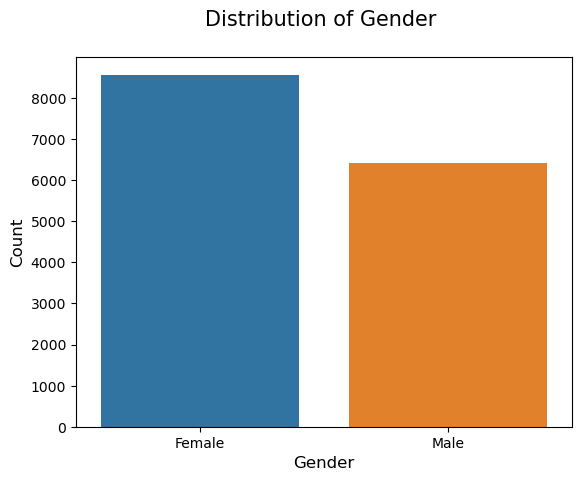

In [14]:
ax = sns.barplot(x = data['Gender'].value_counts().index, y = data['Gender'].value_counts())
plt.xlabel('Gender', size = 12)
plt.xticks(size = 10)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Gender \n', size = 15)
plt.show()

In [15]:
data['Age'].value_counts()

44    2883
54    1273
48    1011
42     867
50     865
46     863
36     832
40     822
38     656
34     552
43     550
58     441
37     313
32     303
39     272
45     260
41     255
35     245
53     194
30     189
47     187
52     180
49     176
59     165
33     142
31     113
57      98
55      86
51      79
56      53
29      44
28      30
27       1
Name: Age, dtype: int64

The age distribution shows the most common ages, the frequency of each age, the range of ages, and any clusters of age groups within the dataset. This information provides valuable insights into the demographics of the dataset.

In [16]:
data['Occupation'].value_counts()

Nurse                   4316
Teacher                 2199
Salesperson             1974
Doctor                  1856
Engineer                1719
Lawyer                  1340
Accountant              1134
Scientist                193
Software Engineer        132
Sales Representative     115
Manager                   22
Name: Occupation, dtype: int64

    ● Top Occupations: The dataset is predominantly composed of Nurse(4316), Teachers(2199), and Salesperson(1974).
    ● Less Common Occupations: Occupations like Sales Representative(115) and Manager(22) are less represented.
    ● Occupational Diversity: The dataset includes a variety of occupations, with a total of 11unique job roles represented.
This summary provides a clear overview of the distribution of occupations within your dataset.

In [17]:
lowest_sleep_duration = data['Sleep Duration'].min()
print(f'Lowest Sleep Duration: {lowest_sleep_duration} hours')

highest_sleep_duration = data['Sleep Duration'].max()
print(f'Highest Sleep Duration: {highest_sleep_duration} hours')

Lowest Sleep Duration: 5.8 hours
Highest Sleep Duration: 8.5 hours


<b>Sleep Health:</b> The range indicates that individuals generally get between 5.8 to 8.5 hours of sleep, which is close to the recommended 7-9 hours of sleep per night for adults, though some are slightly below this range.

<b>Analysis:</b> Understanding this range helps in analyzing how different sleep durations affect other health metrics and conditions in the dataset.

In [18]:
data['Quality of Sleep'].value_counts()

8    5858
6    5212
7    2523
9    1044
5     324
4      39
Name: Quality of Sleep, dtype: int64

● Mode: The most frequently occurring quality of sleep rating is 8, indicating it is the most common sleep quality reported.

● Distribution: There is a relatively even distribution among the different ratings, but ratings of 8, 6, and 7 are slightly more common.

● Quality Range: The values range from 4 to 9, suggesting a scale where lower values might represent poorer sleep quality and higher values represent better sleep quality.

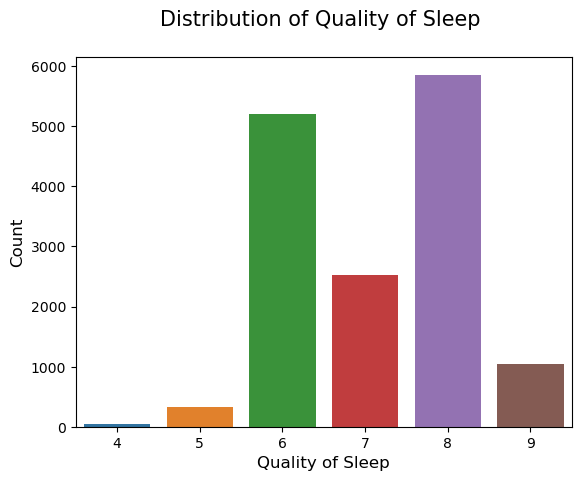

In [19]:
ax = sns.barplot(x = data['Quality of Sleep'].value_counts().index, y = data['Quality of Sleep'].value_counts())
plt.xlabel('Quality of Sleep', size = 12)
plt.xticks(size = 10)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Quality of Sleep \n', size = 15)
plt.show()

In [20]:
lowest_PAL = data['Physical Activity Level'].min()
print(f'Lowest Physical Activity Level: {lowest_PAL}')

highest_PAL = data['Physical Activity Level'].max()
print(f'Highest Physical Activity Level: {highest_PAL}')

Lowest Physical Activity Level: 30
Highest Physical Activity Level: 90


This range highlights the diversity in physical activity levels among the individuals in the dataset.

In [21]:
data['Stress Level'].value_counts()

6    6161
4    3072
7    1811
8    1687
5    1294
3     975
Name: Stress Level, dtype: int64

● Mode: The most common stress level is 6.

● Distribution: Higher stress levels (6, 7, and 8) are more prevalent than lower levels (3, 4, 5).

In [22]:
data['BMI Category'].value_counts()

Overweight       8755
Normal           4962
Obese             659
Normal Weight     624
Name: BMI Category, dtype: int64

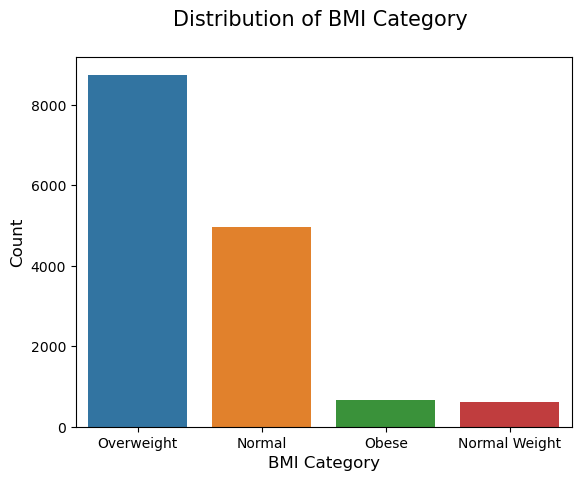

In [23]:
ax = sns.barplot(x = data['BMI Category'].value_counts().index, y = data['BMI Category'].value_counts())
plt.xlabel('BMI Category', size = 12)
plt.xticks(size = 10)
plt.ylabel('Count', size = 12)
plt.title('Distribution of BMI Category \n', size = 15)
plt.show()

This indicates that the majority of the dataset consists of individuals who are overweight, followed by those with a normal BMI, obese individuals, and a smaller group classified as having normal weight.

In [24]:
lowest_BP = data['Blood Pressure'].min()
print(f'Lowest BP: {lowest_BP}')

highest_BP = data['Blood Pressure'].max()
print(f'Highest BP: {highest_BP}')

Lowest BP: 115/75
Highest BP: 142/92


In [25]:
data['Heart Rate'].value_counts()

68    3730
72    3267
70    1371
69    1071
75     876
65     822
71     672
74     642
66     628
76     536
78     428
80     327
73     269
77     192
82      53
79      28
84      20
83      18
67      17
85      13
81      13
86       7
Name: Heart Rate, dtype: int64

    ● Mode: The most frequent heart rate value is 68 bpm, with 3730 occurrences.
    ● High Frequency: Values from 65 bpm to 76 bpm are common, each with over 500 occurrences.
    ● Rare Values: Heart rates above 80 bpm and below 67 bpm are relatively rare in the dataset.
This summary highlights the distribution and frequency of heart rate values, providing insights into the most and least common heart rates within the dataset.

In [26]:
lowest_DS = data['Daily Steps'].min()
print(f'Lowest Daily Steps: {lowest_DS} Steps')

highest_DS = data['Daily Steps'].max()
print(f'Highest Daily Steps: {highest_DS} Steps')

Lowest Daily Steps: 3000 Steps
Highest Daily Steps: 10000 Steps


    ● Health Analysis: Understanding the range of daily steps can help in analyzing physical activity levels and their impact on health outcomes.
    ● Behavior Patterns: The data can be used to identify patterns and correlations between physical activity (daily steps) and other factors such as sleep quality, stress levels, and overall health.

This summary provides a snapshot of the physical activity levels in the dataset, which can be crucial for further analysis and insights into health and lifestyle behaviors.

In [27]:
data['Sleep Disorder'].value_counts()

Healthy        5000
Sleep Apnea    5000
Insomnia       5000
Name: Sleep Disorder, dtype: int64

### Find Skewness

In [28]:
# Calculate skewness for each numerical column
skewness = data.select_dtypes(include=[np.number]).skew()
print("Skewness:\n", skewness)

Skewness:
 Age                        0.097985
Sleep Duration             0.346637
Quality of Sleep          -0.070315
Physical Activity Level    0.204935
Stress Level              -0.150428
Heart Rate                 0.735076
Daily Steps                0.464187
dtype: float64


The numerical features are relatively symmetrical, with no significant skewness

### Find kurtosis

In [29]:
from scipy.stats import skew, kurtosis

# Calculate kurtosis for each numerical column
kurtosis = data.select_dtypes(include=[np.number]).apply(lambda x: kurtosis(x, fisher=False))
print("kurtosis:\n", kurtosis)

kurtosis:
 Age                        2.505654
Sleep Duration             2.192282
Quality of Sleep           1.899447
Physical Activity Level    1.810081
Stress Level               2.276225
Heart Rate                 3.481359
Daily Steps                2.898277
dtype: float64


All numerical features have kurtosis values less than 3, indicating platykurtic distributions, meaning they have lighter tails and flatter peaks compared to a normal distribution.


### Find outliers using IQR method

In [30]:
# Function to detect outliers using IQR method
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detect outliers
outliers = detect_outliers(data)

# Display outliers
for column, outlier_values in outliers.items():
    print(f"{column} outliers: {outlier_values.count()}")

Age outliers: 1
Sleep Duration outliers: 0
Quality of Sleep outliers: 0
Physical Activity Level outliers: 0
Stress Level outliers: 0
Heart Rate outliers: 479
Daily Steps outliers: 55


In [31]:
# Calculate the first and third quartile
q1 = data.quantile(0.25, numeric_only=True)
q3 = data.quantile(0.75, numeric_only=True)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Align data for comparison
data_aligned, lower_bound_aligned = data.align(lower_bound, axis=1, copy=False)
data_aligned, upper_bound_aligned = data.align(upper_bound, axis=1, copy=False)

# Identify outliers
outliers = ((data_aligned < lower_bound_aligned) | (data_aligned > upper_bound_aligned)).any(axis=1)

# Remove outliers
data_cleaned = data[~outliers]

# Save or display the cleaned data
data_cleaned.shape

(14520, 12)

In [32]:
data_cleaned

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [33]:
data = data_cleaned

### Visualization

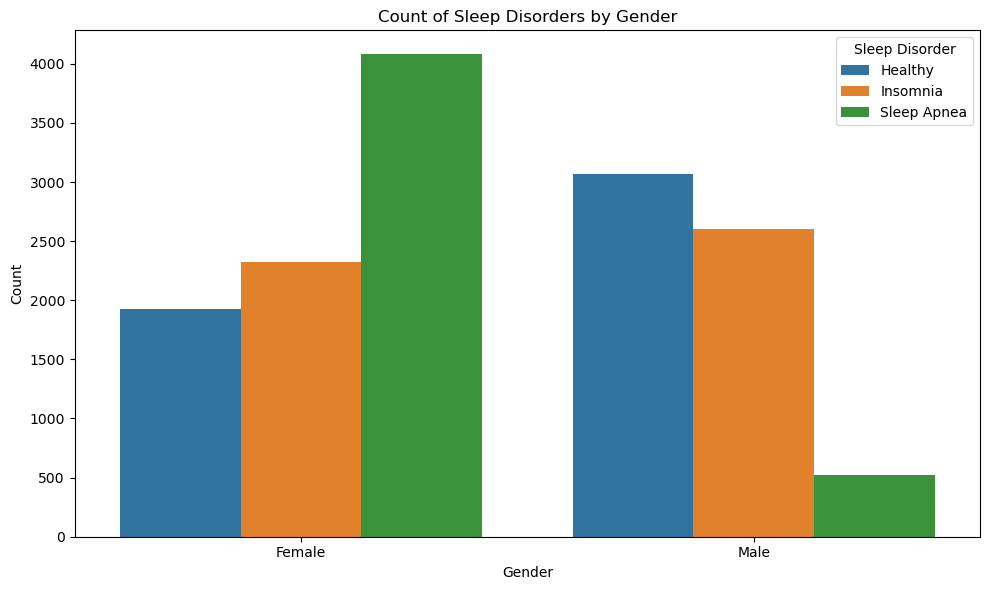

In [34]:
# Ensure 'Gender' and 'Sleep Disorder' are treated as categorical variables
data['Gender'] = data['Gender'].astype('category')
data['Sleep Disorder'] = data['Sleep Disorder'].astype('category')

# Create a count plot to show the relationship between 'Gender' and 'Sleep Disorder'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Sleep Disorder')
plt.title('Count of Sleep Disorders by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder', loc='upper right')
plt.tight_layout()

# Displaying the Plot
plt.show()

These pie charts are useful for understanding the distribution of sleep disorders across different occupations. By analyzing these charts, you can gain insights into:

    ● Proportional Distribution: How sleep disorders are proportionally distributed within each occupation.
    ● Occupational Impact: The impact of different job roles on the prevalence of sleep disorders.
    ● Comparative Analysis: Compare and contrast sleep disorder patterns across various occupations.
These insights can help in targeting interventions or further investigations into occupational health and its impact on sleep

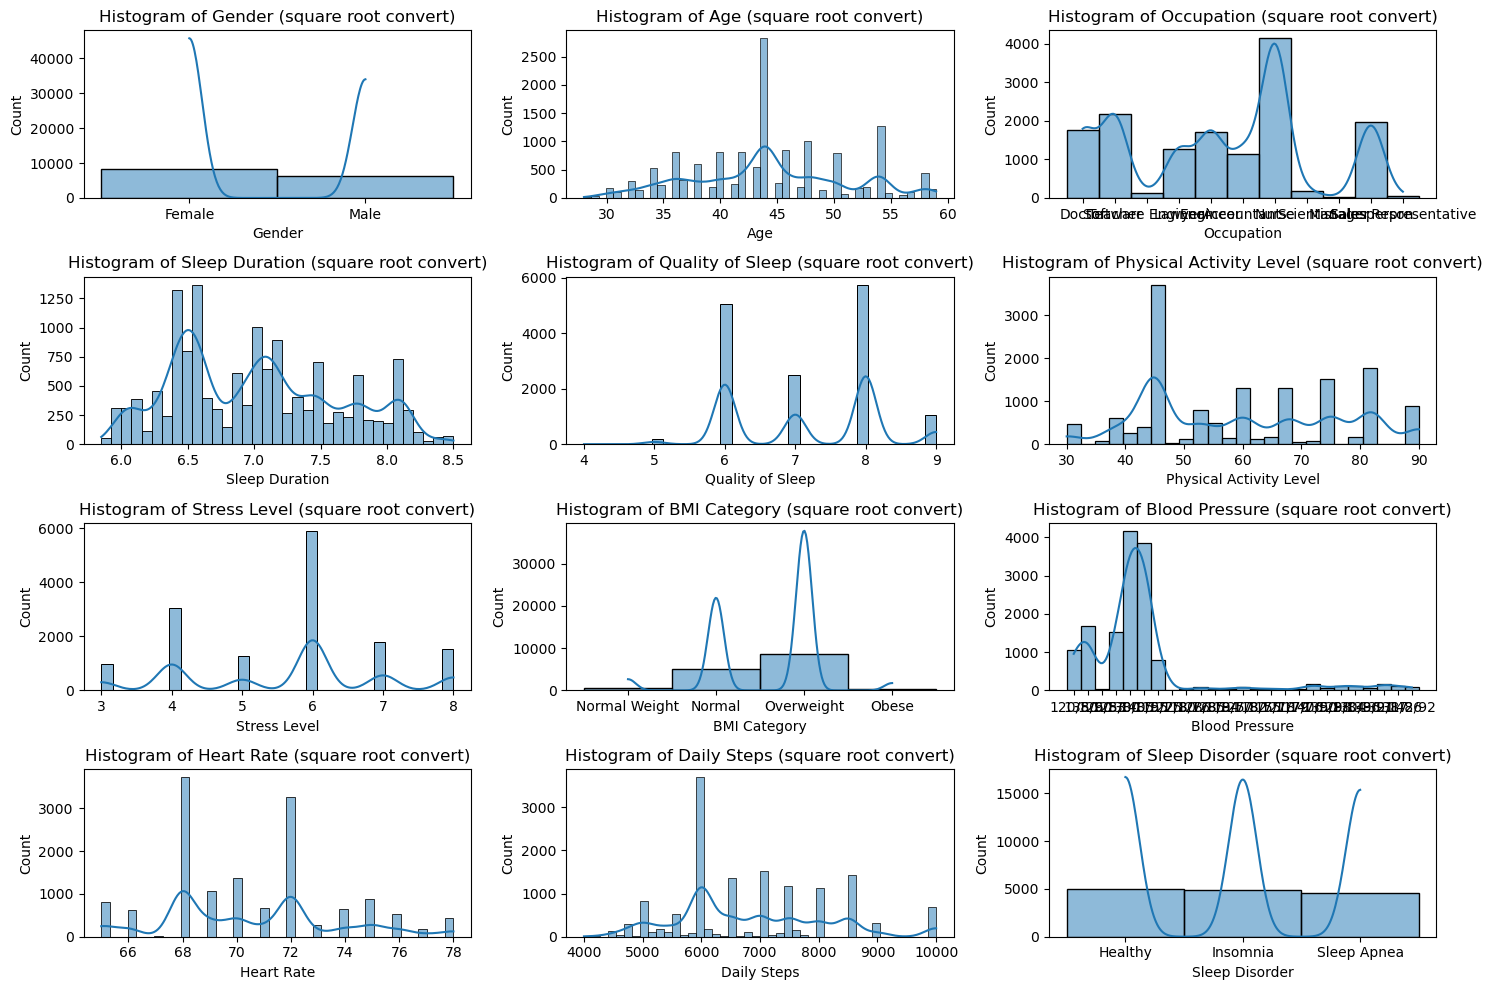

In [35]:
# Column selection
columns_to_convert = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

# Figure size
plt.figure(figsize=(15, 10))

# Loop through columns
for i, col in enumerate(columns_to_convert, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col} (square root convert)')
    
# Layout Adjustment
plt.tight_layout()

# Displaying the Plot
plt.show()

  The visualizations provide insights into the distribution of each feature in the dataset. By examining these histograms and KDE plots, you can identify:

    ● Common values: Peaks in the histograms.
    ● Data distribution: Whether data is normally distributed, skewed, or has multiple modes.
    ● Outliers and anomalies: Unusual spikes or gaps in the data.
    ● Comparative analysis: Differences in distributions across categorical features.

 This analysis helps in understanding the dataset's characteristics, which can inform preprocessing steps and guide model selection and tuning.

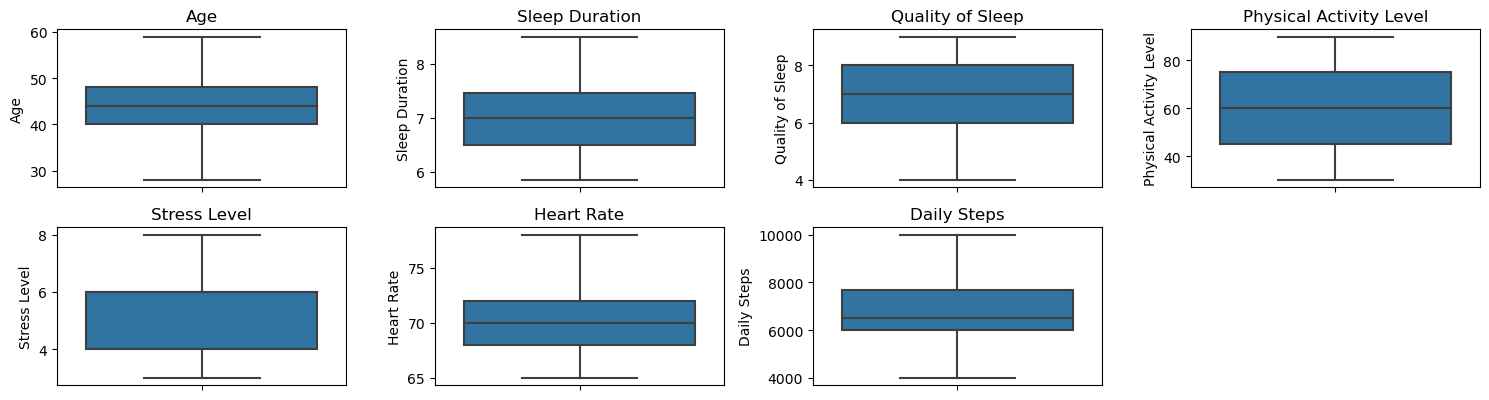

In [36]:
# Figure setup
plt.figure(figsize = (15, 10))

# Enumerate Numerical columns
for i, col in enumerate(data.select_dtypes(include = ['int64', 'float64']).columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
    
# Layout adjustment
plt.tight_layout()

# Displaying the Plot
plt.show()

These boxplots provide a visual summary of the distribution and variability of each numerical feature in the dataset. By examining these plots, you can:

    ● Identify Central Tendency: The median line shows the central value of the data.
    ● Understand Data Spread: The IQR indicates the spread of the middle 50% of the data.
    ● Detect Skewness: Asymmetry in the boxplot indicates skewness in the data.
    ● Spot Outliers: Points outside the whiskers are potential outliers that may require further investigation.
    ● Compare Distributions: Compare the distribution characteristics across different numerical features.

 This visual analysis helps in understanding the overall data distribution, identifying anomalies, and preparing the data for further analysis or modeling.

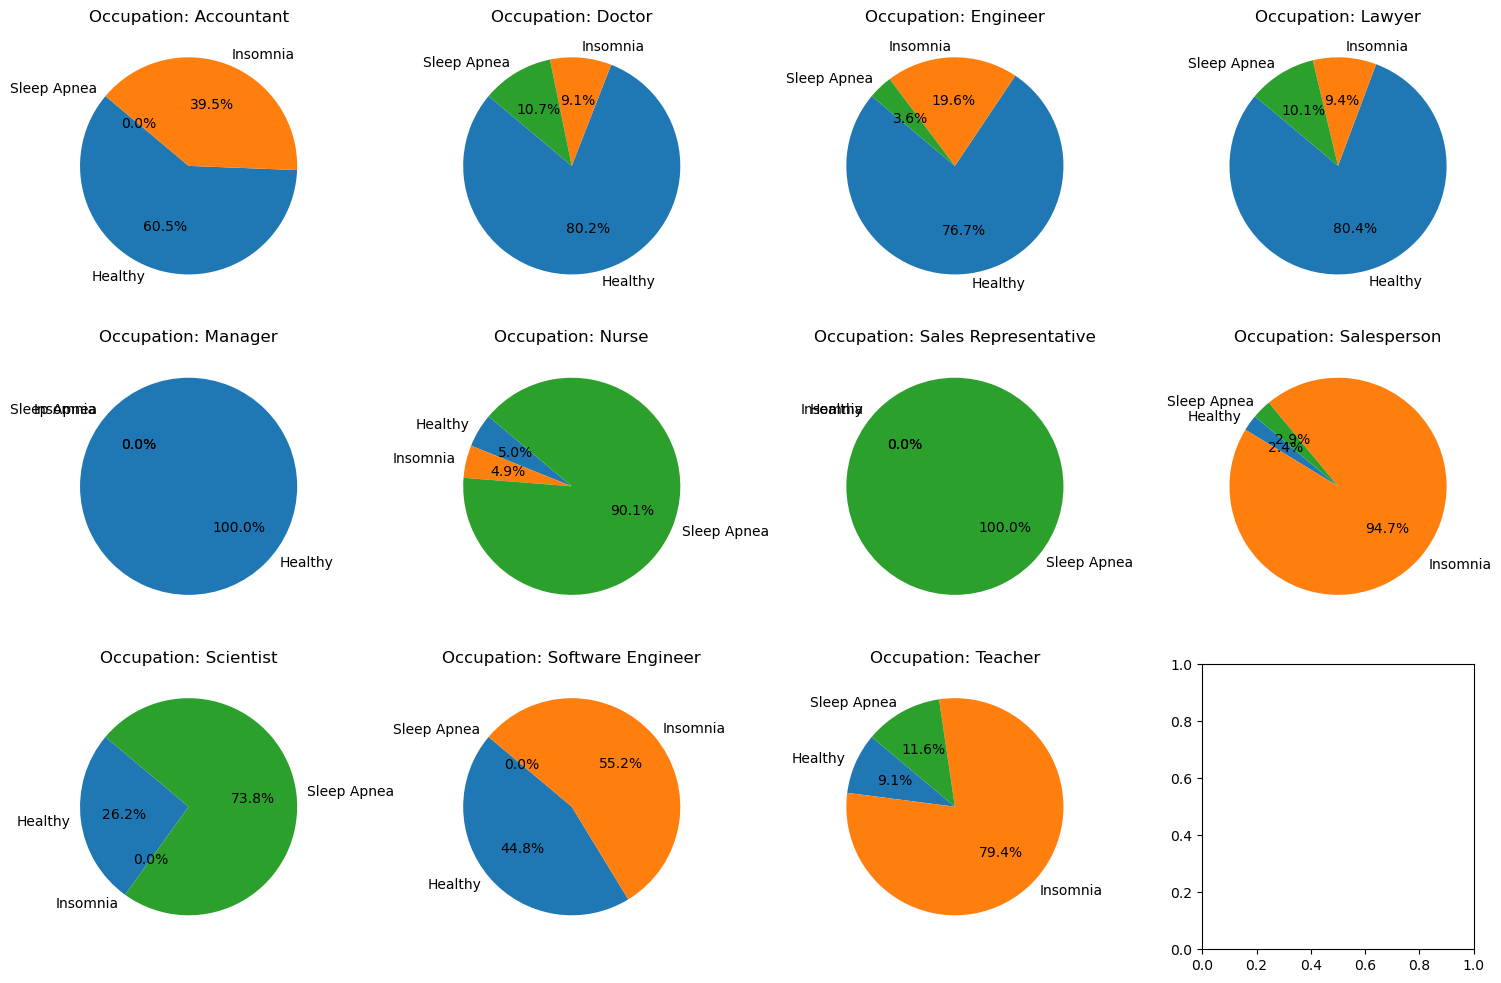

In [37]:
# Ensure 'Occupation' and 'Sleep Disorder' are treated as categorical variables
data['Occupation'] = data['Occupation'].astype('category')
data['Sleep Disorder'] = data['Sleep Disorder'].astype('category')

# Calculate the count of each Sleep Disorder for each Occupation
occupation_sleep_disorder_counts = data.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)

# Calculate the proportion of Sleep Disorders within each Occupation
occupation_sleep_disorder_proportions = occupation_sleep_disorder_counts.div(occupation_sleep_disorder_counts.sum(axis=1), axis=0)

# Create the pie charts
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, occupation in enumerate(occupation_sleep_disorder_proportions.index):
    axes[i].pie(
        occupation_sleep_disorder_proportions.loc[occupation], 
        labels=occupation_sleep_disorder_proportions.columns, 
        autopct='%1.1f%%', 
        startangle=140
    )
    axes[i].set_title(f'Occupation: {occupation}')

# Layout Adjustment
plt.tight_layout()

# Displaying the Plot
plt.show()

These pie charts are useful for understanding the distribution of sleep disorders across different occupations. By analyzing these charts, you can gain insights into:

    ● Proportional Distribution: How sleep disorders are proportionally distributed within each occupation.
    ● Occupational Impact: The impact of different job roles on the prevalence of sleep disorders.
    ● Comparative Analysis: Compare and contrast sleep disorder patterns across various occupations.
These insights can help in targeting interventions or further investigations into occupational health and its impact on sleep.

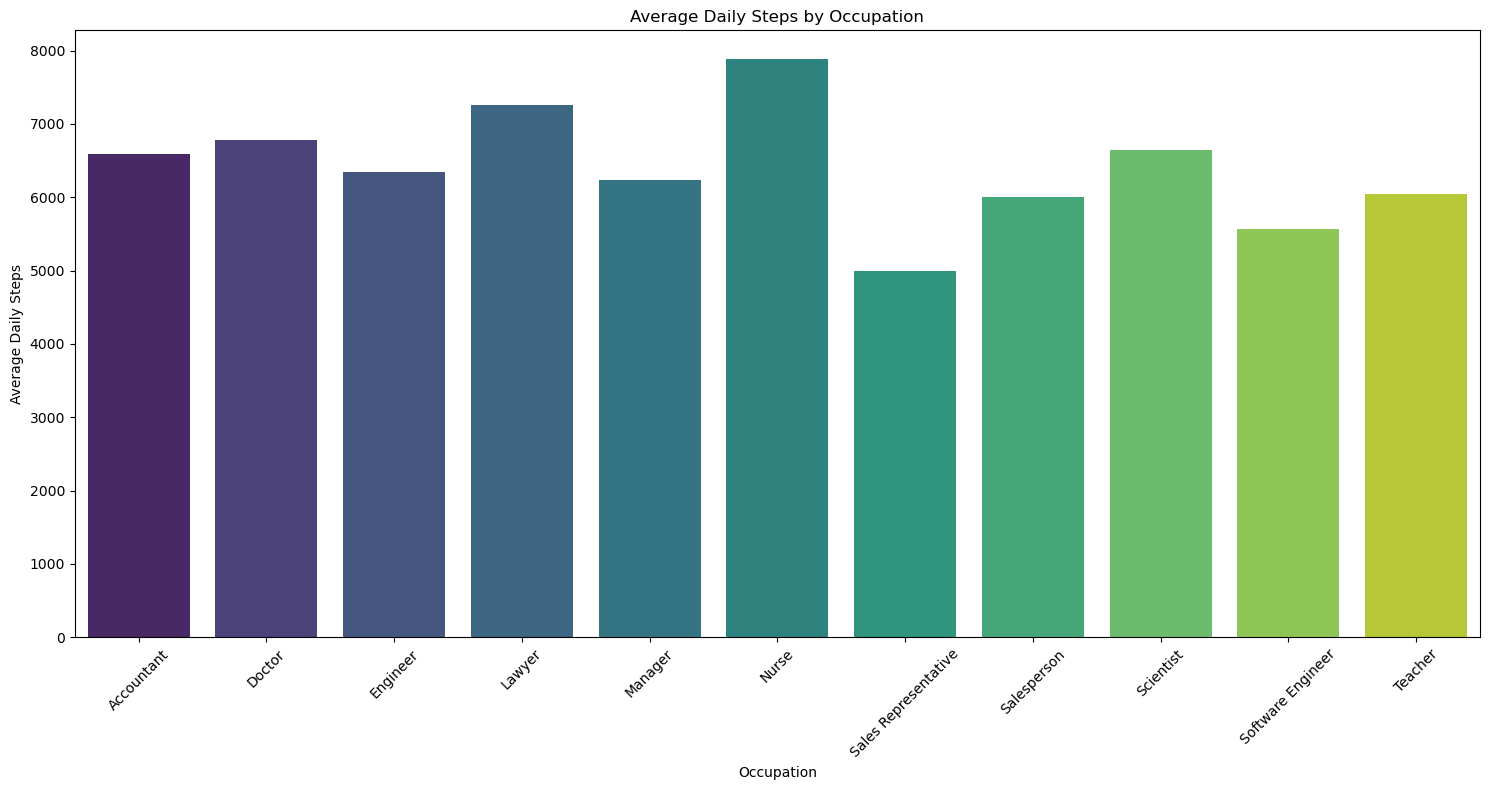

In [38]:
# Ensure 'Occupation' is treated as a categorical variable
data['Occupation'] = data['Occupation'].astype('category')

# Calculate the average daily steps for each occupation
average_daily_steps = data.groupby('Occupation')['Daily Steps'].mean().reset_index()

# Sort by average daily steps for better visualization
average_daily_steps = average_daily_steps.sort_values(by='Daily Steps', ascending=False)

# Create a bar plot to show the relationship between 'Occupation' and 'Daily Steps'
plt.figure(figsize=(15, 8))
sns.barplot(data=average_daily_steps, x='Occupation', y='Daily Steps', palette='viridis')

# Title and Labels
plt.title('Average Daily Steps by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Daily Steps')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the Plot
plt.tight_layout()
plt.show()

This bar plot is useful for understanding the average daily steps across different occupations. By analyzing this plot, you can gain insights into:

    ● Activity Levels: The overall activity level associated with different job roles.
    ● Comparative Analysis: How different occupations compare in terms of physical activity as measured by daily steps.
These insights can help in targeting health interventions or understanding the lifestyle impact of different occupations.

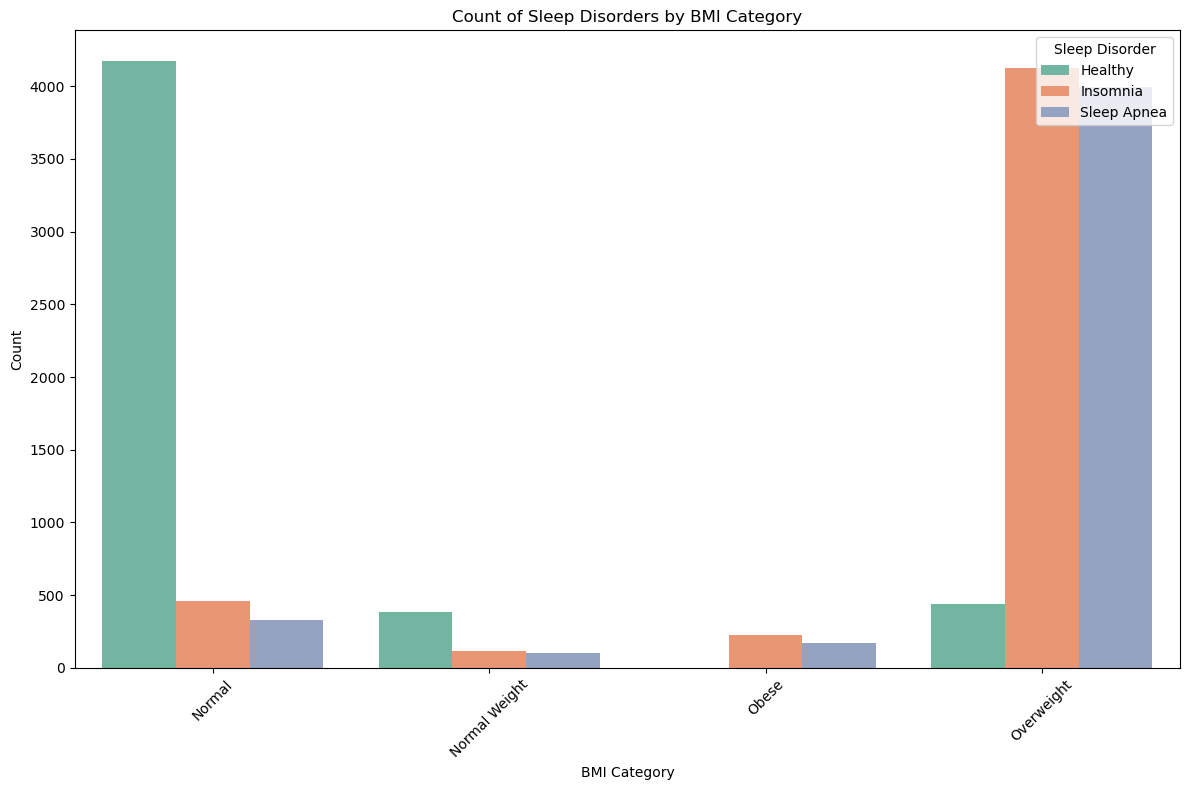

In [39]:
# Ensure 'BMI Category' and 'Sleep Disorder' are treated as categorical variables
data['BMI Category'] = data['BMI Category'].astype('category')
data['Sleep Disorder'] = data['Sleep Disorder'].astype('category')

# Create a count plot to show the relationship between 'BMI Category' and 'Sleep Disorder'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='BMI Category', hue='Sleep Disorder', palette='Set2')

# Title and Labels
plt.title('Count of Sleep Disorders by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the Plot
plt.show()

This count plot is useful for understanding the distribution of sleep disorders across different BMI categories. By analyzing this plot, you can gain insights into:

    ● BMI-Specific Trends: How sleep disorders are distributed within different BMI categories.
    ● Health Impact: The impact of BMI on the prevalence of sleep disorders.
    ● Patterns and Outliers: General trends and any outliers or unique patterns in the data.

 These insights can help in targeting interventions or further investigations into the relationship between BMI and sleep disorders.

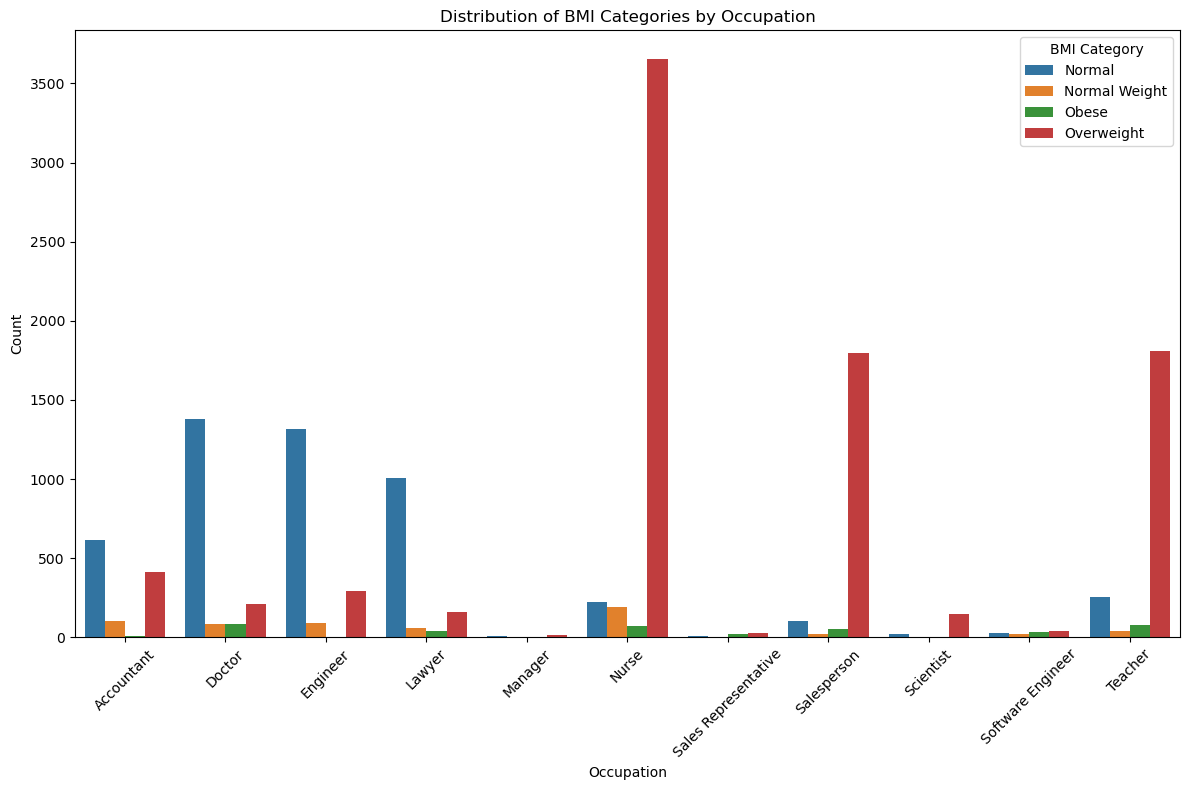

In [40]:
# Ensure 'BMI Category' and 'Occupation' are treated as categorical variables
data['BMI Category'] = data['BMI Category'].astype('category')
data['Occupation'] = data['Occupation'].astype('category')

# Count plot to show the distribution of BMI categories within each occupation
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Occupation', hue='BMI Category')
plt.title('Distribution of BMI Categories by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='BMI Category')
plt.tight_layout()

# Display the plot
plt.show()

This bar plot is useful for understanding the distribution of BMI categories across different occupations. By analyzing this plot, you can gain insights into:

    ● Proportional Distribution: How BMI categories are distributed within each occupation.
    ● Occupational Impact: The impact of different job roles on the prevalence of various BMI categories.
    ● Comparative Analysis: Compare and contrast BMI category patterns across various occupations.

 These insights can help in targeting health interventions or further investigations into occupational health and its impact on BMI.

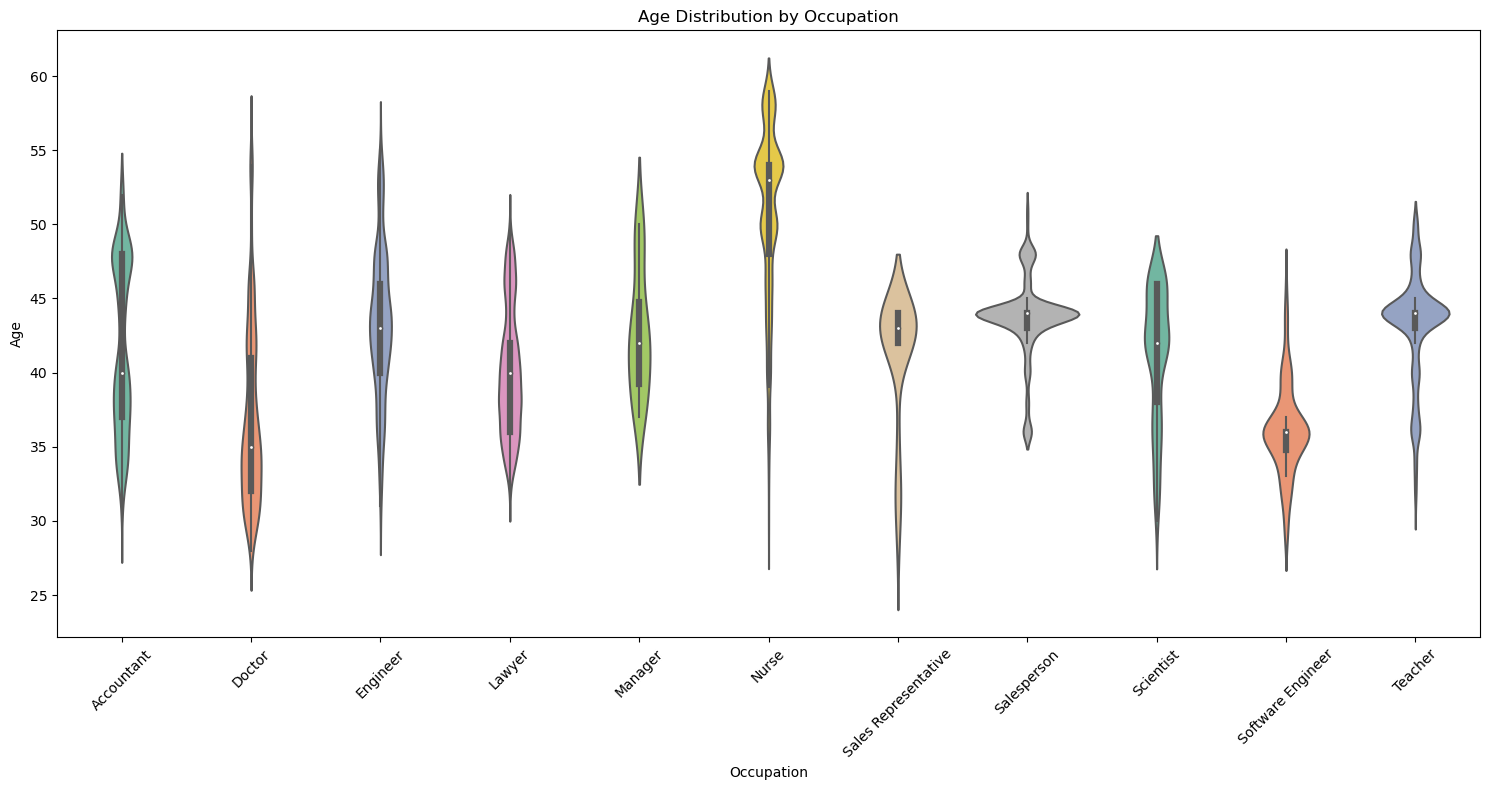

In [41]:
# Ensure 'Occupation' is treated as a categorical variable
data['Occupation'] = data['Occupation'].astype('category')

# Plotting Occupation vs Age
plt.figure(figsize=(15, 8))

# Violin Plot
sns.violinplot(data=data, x='Occupation', y='Age', palette='Set2')

# Title and Labels
plt.title('Age Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.xticks(rotation=45)

# Displaying the Plot
plt.tight_layout()
plt.show()

This violin plot is useful for understanding the detailed distribution of ages across different occupations. By analyzing this plot, you can gain insights into:

    ● Age Distributions: The density and spread of ages within each occupation.
    ● Median Ages and IQR: The central tendency and variability of age for different occupations.
    ● Density Patterns: Detailed patterns in the distribution of ages within each occupation.
These insights can help in understanding the demographics of different occupations and potentially inform workforce planning or further research into occupational trends.

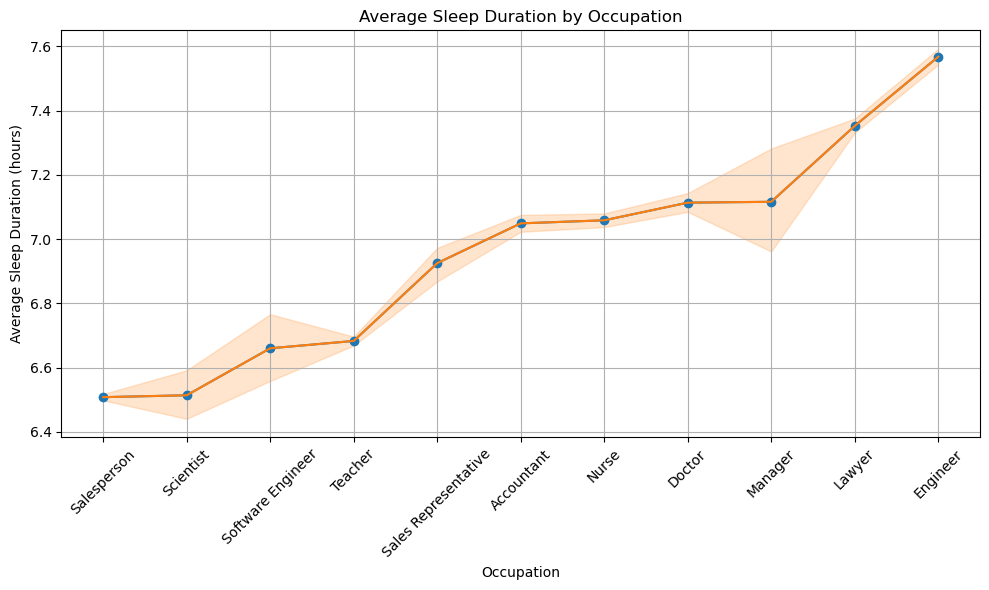

In [42]:
# Ensure 'Occupation' is treated as a categorical variable
data['Occupation'] = data['Occupation'].astype('category')

# Calculate the average sleep duration for each occupation
average_sleep_duration = data.groupby('Occupation')['Sleep Duration'].mean().reset_index()

# Sort by average sleep duration for a better visualization
average_sleep_duration = average_sleep_duration.sort_values(by='Sleep Duration')

# Create a line chart to show the relationship between 'Occupation' and 'Sleep Duration'
# Figure setup
plt.figure(figsize=(10, 6))

# Line plot
plt.plot(average_sleep_duration['Occupation'], average_sleep_duration['Sleep Duration'], marker='o')
sns.lineplot(data = data, x = 'Occupation', y ='Sleep Duration')

# Titles and labels
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation = 45)

# Grid
plt.grid(True)

# Layout adjustment
plt.tight_layout()

# Displaying the Plot
plt.show()

This line chart is useful for understanding how sleep duration varies across different occupations. By analyzing this plot, you can gain insights into:

    ● Average Sleep Duration: The typical amount of sleep people in different occupations get.
    ● Occupational Impact: How different job roles might impact sleep habits.
    ● Comparative Analysis: Easily compare and contrast sleep patterns among various occupations.
    
These insights can help inform further investigations into occupational health and its effects on sleep, potentially guiding interventions or policy decisions aimed at improving sleep health across different job sectors.

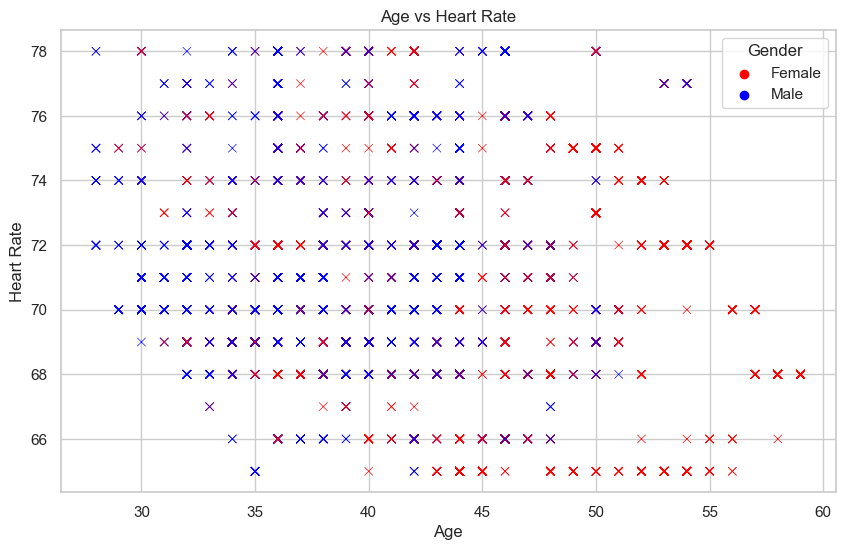

In [43]:
# Scater Plot
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting Age vs Heart Rate
# Figure setup
plt.figure(figsize=(10, 6))

# Scatter Plot
sns.scatterplot(data, x='Age', y='Heart Rate', hue='Gender', palette={'Male': 'blue', 'Female': 'red'}, marker = 'x')

# Title and Labels
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')

# Set legend
plt.legend(title='Gender')

# Displaying the Plot
plt.show()

This scatter plot is useful for understanding the relationship between age and heart rate, with a distinction made between genders. By analyzing this plot, you can gain insights into:

<b>Distribution of Heart Rates:</b>
Heart rates range approximately from 66 to 78 beats per minute.
The distribution of heart rates for both males and females appears to be fairly uniform across this range.

<b>Age Range:</b>
Ages range from 30 to 60 years.
There is a noticeable concentration of data points between the ages of 35 and 55.

<b>Gender Differences:</b>
Both genders are well represented across the age spectrum.
There is no immediately apparent trend suggesting a difference in heart rate based on gender.

## Encoding Target Column(Sleep Disorder) using Label Encoding

In [44]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [45]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sleep Disorder' column
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

# Display the first few rows to verify the changes
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,0
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,0
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,0
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,0
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,0


The categorical 'Sleep Disorder' column has been successfully transformed into numerical values using 'LabelEncoder', preparing the dataset for machine learning tasks. The transformation replaces categories with integers, making the data suitable for algorithms that require numerical input.

In [46]:
data['Sleep Disorder'].value_counts()

0    4999
1    4922
2    4599
Name: Sleep Disorder, dtype: int64

### Encoding categorical values using One-hot Encoding

In [47]:
no_out = data
df_encoded = pd.get_dummies(no_out, columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'])

In [48]:
df_encoded.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Female,Gender_Male,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,35,6.65,7,50,7,71,7100,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,42,6.90,8,52,4,66,7000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,34,6.95,7,66,6,74,6100,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,32,6.90,6,52,7,71,6500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,6.85,7,60,6,71,6500,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In summary, one-hot encoding converts categorical variables into a format that can be provided to machine learning algorithms to improve their performance and interpretability

In [49]:
df_encoded.shape

(14520, 50)

In [50]:
data = df_encoded

In [51]:
data

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Female,Gender_Male,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,35,6.65,7,50,7,71,7100,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,42,6.90,8,52,4,66,7000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,34,6.95,7,66,6,74,6100,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,32,6.90,6,52,7,71,6500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,6.85,7,60,6,71,6500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,59,8.10,9,75,3,68,7000,2,1,0,...,0,0,0,0,0,0,0,0,1,0
14996,59,8.00,9,75,3,68,7000,2,1,0,...,0,0,0,0,0,0,0,0,1,0
14997,59,8.10,9,75,3,68,7000,2,1,0,...,0,0,0,0,0,0,0,0,1,0
14998,59,8.10,9,75,3,68,7000,2,1,0,...,0,0,0,0,0,0,0,0,1,0


### Feature selection

In [52]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Assume your processed DataFrame is df, with 50 columns and 14520 rows
# And 'YourTargetColumn' is the name of the target column

# Separate features and target variable
X = df_encoded.drop('Sleep Disorder', axis=1)
y = df_encoded['Sleep Disorder']

# Apply SelectKBest to extract top k best features
k = 12  # Adjust k to select the number of top features you want
bestfeatures = SelectKBest(score_func=chi2, k=k)
fit = bestfeatures.fit(X, y)

# Get the selected feature names
selected_features = X.columns[fit.get_support()]

print("Selected features:", selected_features)
X_new = fit.transform(X)

Selected features: Index(['Age', 'Physical Activity Level', 'Daily Steps', 'Occupation_Nurse',
       'Occupation_Salesperson', 'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Overweight', 'Blood Pressure_125/80',
       'Blood Pressure_130/85', 'Blood Pressure_135/90',
       'Blood Pressure_140/95'],
      dtype='object')


<b>Model Training:</b> The reduced feature set can be used to train more efficient and potentially more accurate models.

<b>Feature Importance:</b> Understanding which features are most important can provide insights into the factors that influence sleep disorders, which could be valuable for further analysis and interventions.

In [53]:
# Convert the transformed array back to a DataFrame
X_new_df = pd.DataFrame(X_new, columns=selected_features)

# Display the DataFrame with the selected features
X_new_df.head()

,Age,Physical Activity Level,Daily Steps,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Category_Normal,BMI Category_Overweight,Blood Pressure_125/80,Blood Pressure_130/85,Blood Pressure_135/90,Blood Pressure_140/95
0,35.0,50.0,7100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42.0,52.0,7000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,34.0,66.0,6100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,32.0,52.0,6500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,37.0,60.0,6500.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


<b>Model Training:</b> The new DataFrame X_new_df with the selected features is ready for model training, ensuring that only the most relevant features are used, which can improve model performance and reduce overfitting.

<b>Further Analysis:</b> This reduced feature set can be used for more focused exploratory data analysis and visualization, providing clearer insights into the relationships between these key features and the target variable.

### Split Dataset

In [54]:
# Assigns the selected columns(X_new_df) to the X variable
X = X_new_df

In [55]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<b>Model Validation:</b> Splitting the data into training and testing sets is essential for validating the model's performance. It helps in detecting overfitting, where a model performs well on the training data but poorly on the testing data.

<b>Reproducibility:</b> Setting a 'random_state' ensures that the results are reproducible. This is crucial for consistency in model evaluation and comparison.

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11616, 12), (2904, 12), (11616,), (2904,))

    1) X_train.shape: '(11616, 12)'
        ● 11616: Number of training samples.
        ● 12: Number of selected features in the training set after feature selection.
        
    2) X_test.shape: '(2904, 12)'
        ● 2904: Number of testing samples.
        ● 12: Number of selected features in the testing set after feature selection.
        
    3) y_train.shape: '(11616,)'
        ● 11616: Number of target labels for the training samples.
    
    4) y_test.shape: '(2904,)'
        ● 2904: Number of target labels for the testing samples.
        
This indicates that after applying feature selection, both the training and testing sets have been reduced to 12 features, making the dataset more manageable and potentially improving the model's performance

## Model Training and Evaluation

 ### Logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

In [59]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [60]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.887396694214876
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1026
           1       0.90      0.88      0.89       981
           2       0.90      0.89      0.89       897

    accuracy                           0.89      2904
   macro avg       0.89      0.89      0.89      2904
weighted avg       0.89      0.89      0.89      2904

Confusion Matrix:
 [[916  60  50]
 [ 78 861  42]
 [ 58  39 800]]


### Decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
# Predict on the test set
y_pred = decision_tree.predict(X_test)

In [63]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [64]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9573002754820936
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1026
           1       0.97      0.95      0.96       981
           2       0.95      0.97      0.96       897

    accuracy                           0.96      2904
   macro avg       0.96      0.96      0.96      2904
weighted avg       0.96      0.96      0.96      2904

Confusion Matrix:
 [[981  17  28]
 [ 33 929  19]
 [ 18   9 870]]


### Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [66]:
# Predict on the test set
y_pred = naive_bayes.predict(X_test)

In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [68]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8929063360881543
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      1026
           1       0.91      0.88      0.89       981
           2       0.88      0.92      0.90       897

    accuracy                           0.89      2904
   macro avg       0.89      0.89      0.89      2904
weighted avg       0.89      0.89      0.89      2904

Confusion Matrix:
 [[909  46  71]
 [ 82 860  39]
 [ 37  36 824]]


### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Predict on the test set
y_pred = random_forest.predict(X_test)

In [71]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [72]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9610881542699724
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1026
           1       0.98      0.95      0.96       981
           2       0.95      0.97      0.96       897

    accuracy                           0.96      2904
   macro avg       0.96      0.96      0.96      2904
weighted avg       0.96      0.96      0.96      2904

Confusion Matrix:
 [[985  13  28]
 [ 26 933  22]
 [ 15   9 873]]


### Adaboost

In [73]:
from sklearn.ensemble import AdaBoostClassifier

# Train the AdaBoost model
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [74]:
# Make predictions
y_pred = adaboost.predict(X_test)

In [75]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [76]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8960055096418733
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1026
           1       0.90      0.90      0.90       981
           2       0.91      0.91      0.91       897

    accuracy                           0.90      2904
   macro avg       0.90      0.90      0.90      2904
weighted avg       0.90      0.90      0.90      2904

Confusion Matrix:
 [[904  73  49]
 [ 73 879  29]
 [ 55  23 819]]


### Hyperparameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score: 0.9472275671778807


In [78]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
cm_best = confusion_matrix(y_test, y_pred_best)

print(f'Test Set Accuracy: {accuracy_best}')
print('Classification Report:')
print(report_best)

Test Set Accuracy: 0.949724517906336
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1026
           1       0.97      0.94      0.95       981
           2       0.94      0.96      0.95       897

    accuracy                           0.95      2904
   macro avg       0.95      0.95      0.95      2904
weighted avg       0.95      0.95      0.95      2904



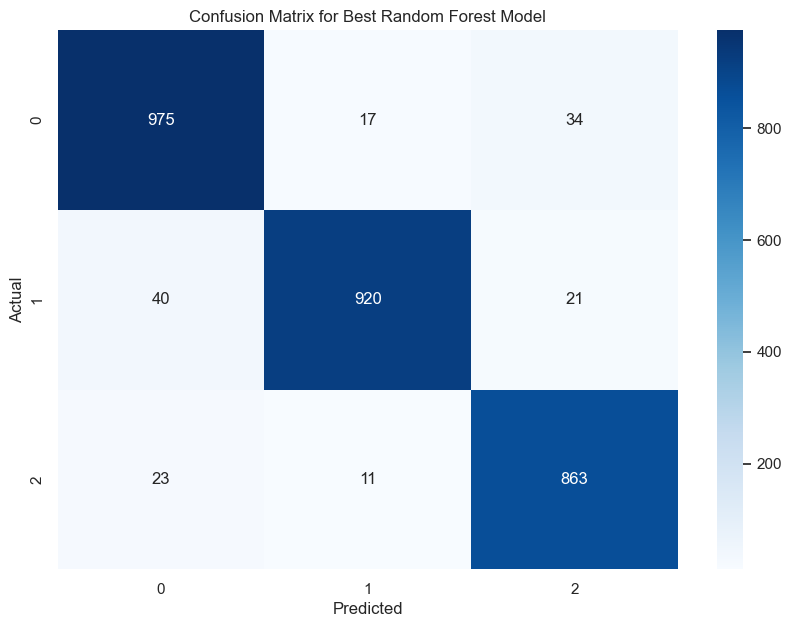

In [79]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

## Conclusion:

<b>The primary objective of this project was to analyze a dataset containing the attributes Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps and Sleep Disorder.  By using five machine learning algorithms namely Logistic Regression, Decision Tree, Naive Base, Random Forest and AdaBoost, we aim to accurately classify whether a person is healthy or has sleep apnea and insomnia based on the given features.</b>

<b>After thorough data preprocessing, including handling outliers and encoding categorical variables, feature selection was performed using the KBest method, resulting in the selection of 12 optimal features. The dataset was then split into training and testing sets with a test size of 20%.</b>

<b>Among the models tested, the Random Forest algorithm achieved the highest accuracy of 96%. However, after hyperparameter tuning, the accuracy slightly decreased to 94%. This indicates that the initial model was already well-optimized, and further tuning did not significantly enhance performance.</b>

<b>Key insights from the analysis revealed that individuals with insufficient sleep and those classified as overweight in the BMI category are more prone to developing sleep disorders. Additionally, it was observed that a significant number of overweight individuals in the dataset were nurses, suggesting potential occupational influences on sleep health.</b>

<b>In conclusion, the Random Forest model proved to be the most effective in predicting sleep disorders within this dataset. The findings underscore the importance of maintaining healthy sleep patterns and managing BMI to mitigate the risk of sleep-related health issues.</b>